In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns; sns.set(font_scale=1.2)
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('IRIS.csv')

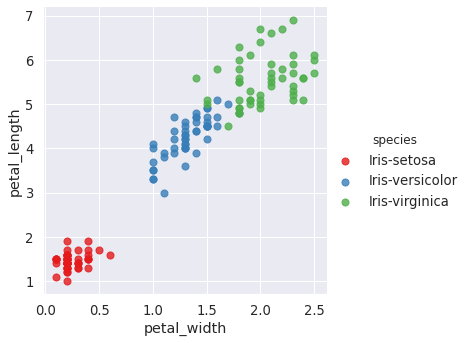

In [5]:
sns.lmplot('petal_width', 'petal_length',
data=data,
hue='species',
palette='Set1',
fit_reg=False,
scatter_kws={"s": 50});

In [6]:
#8.7
from sklearn import svm
#---Converting the Columns as Matrices---
points = data[['petal_width', 'petal_length']].values
result = data['species']

In [7]:
clf = svm.SVC(kernel = 'linear')
clf.fit(points, result)

SVC(kernel='linear')

In [8]:
print('Vector of weights (w) = ',clf.coef_[0])
print('b = ',clf.intercept_[0])
print('Indices of support vectors = ', clf.support_)
print('Support vectors = ', clf.support_vectors_)
print('Number of support vectors for each class = ', clf.n_support_)
print('Coefficients of the support vector in the decision function = ',
np.abs(clf.dual_coef_))

Vector of weights (w) =  [-0.7 -1.1]
b =  3.2799999713897705
Indices of support vectors =  [ 44  50  52  54  56  63  70  72  76  77  83  85  86  98 106 119 121 123
 126 127 133 134 138 142 146 149]
Support vectors =  [[0.4 1.9]
 [1.4 4.7]
 [1.5 4.9]
 [1.5 4.6]
 [1.6 4.7]
 [1.4 4.7]
 [1.8 4.8]
 [1.5 4.9]
 [1.4 4.8]
 [1.7 5. ]
 [1.6 5.1]
 [1.6 4.5]
 [1.5 4.7]
 [1.1 3. ]
 [1.7 4.5]
 [1.5 5. ]
 [2.  4.9]
 [1.8 4.9]
 [1.8 4.8]
 [1.8 4.9]
 [1.5 5.1]
 [1.4 5.6]
 [1.8 4.8]
 [1.9 5.1]
 [1.9 5. ]
 [1.8 5.1]]
Number of support vectors for each class =  [ 1 13 12]
Coefficients of the support vector in the decision function =  [[1.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         1.         0.23668638 0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.23668638 0.70731176 1.         1.         1.         1.
  1.         1.         1.         1.         1.     

In [ ]:
#Vector of weights (w) =  [-0.7 -1.1] 
#W0 =-.07 W1 1.1
#b =  3.2799999713897705


In [12]:
b0 = 3.2799999713897705
w0 =-.07
w1 = 1.1


In [13]:
x2 = (-1*b0)/w1

In [14]:
x1 = (-1*b0)/w0

In [17]:
slope = x2/x1

In [18]:
print(slope)

-0.06363636363636364


In [21]:
#---w is the vector of weights---
w = clf.coef_[0]
#---find the slope of the hyperplane---
slope = -w[0] / w[1]
b = clf.intercept_[0]
#---find the coordinates for the hyperplane---
xx = np.linspace(0, 4)
yy = slope * xx - (b / w[1])


In [25]:
#---plot the margins---
s = clf.support_vectors_[0]
#---first support vector---
yy_down = slope * xx + (s[1] - slope * s[0])


In [26]:
s = clf.support_vectors_[-1]
#---last support vector---
yy_up = slope * xx + (s[1] - slope * s[0])

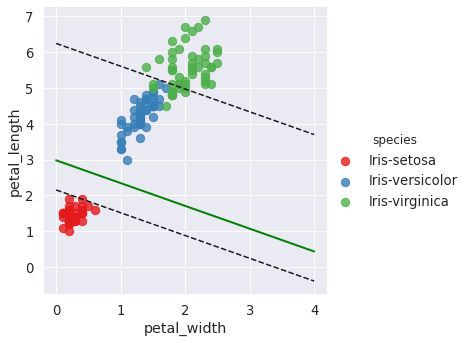

In [31]:
#---plot the points---
sns.lmplot('petal_width', 'petal_length', data=data, hue='species', palette='Set1',
fit_reg=False, scatter_kws={"s": 70})
#---plot the hyperplane---
plt.plot(xx, yy, linewidth=2, color='green');
#---plot the 2 margins---
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')

In [32]:
print(clf.predict([[3,3]])[0])
print(clf.predict([[4,0]])[0])
print(clf.predict([[2,2]])[0])
print(clf.predict([[1,2]])[0])

Iris-versicolor
Iris-setosa
Iris-versicolor
Iris-setosa


In [33]:
#accuracy of the model#